# Feature Engineering before cleaning 

During Our initial data cleaning efforts rendered a considerable portion of our numerical variables as categorical. Therfore, the conventional approach of conducting feature engineering after data cleaning wouldn't suffice. 

In this notebook, we delve into the insights gleaned from our multivariate analysis, capitalizing on its findings to guide our feature engineering strategies. Furthermore, we explore the application of Principal Component Analysis (PCA) across a diverse array of features. 

The conclusions from the multivariate analysis and the outcomes of PCA brings forth a comprehensive perspective that helped us of create new features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

Read the data

In [2]:
df = pd.read_csv('../sql/home_credit_train_ff.csv', index_col=0)

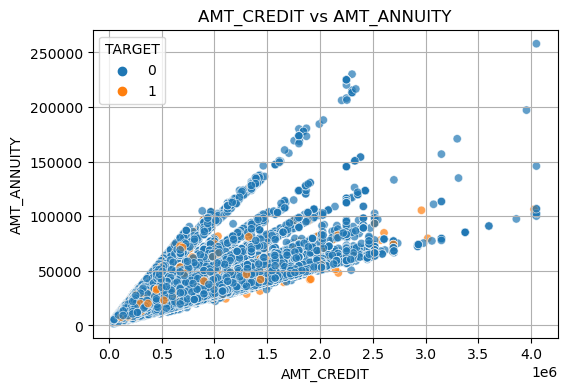

In [3]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='AMT_CREDIT', y='AMT_ANNUITY', color='blue', alpha=0.7, hue='TARGET')

plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.title('AMT_CREDIT vs AMT_ANNUITY')
plt.grid(True)

Dividing the "Credit amount of the loan" by the "Loan annuity" in the context of a home credit risk data science project could potentially yield a feature that provides insights into the financial health and risk assessment of loan applicants.

The "Credit amount of the loan" refers to the total amount of money that a borrower is requesting in the loan application. This represents the initial loan principal that will be disbursed to the borrower if the loan is approved.

The "Loan annuity" refers to the fixed periodic payment that the borrower needs to make to repay the loan over its term. This payment typically includes both the principal repayment and the interest on the loan.

When you divide the "Credit amount of the loan" by the "Loan annuity", you are essentially calculating a measure that relates the loan amount to the borrower's ability to make regular payments. 

In [4]:
df['Risk_Evaluation'] = df['AMT_CREDIT'] / df['AMT_ANNUITY'] ## AMT_CREDIT has been converted to IQR 

In [5]:
df['Risk_Evaluation'].isna().sum()

12

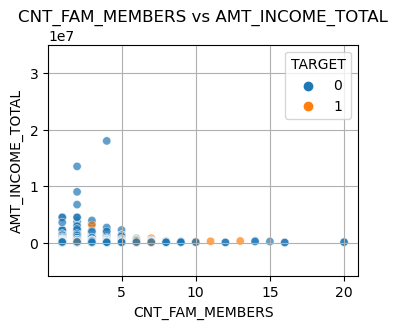

In [6]:
plt.figure(figsize=(4,3))

sns.scatterplot(data=df, y='AMT_INCOME_TOTAL', x='CNT_FAM_MEMBERS', color='blue', alpha=0.7, hue='TARGET')

plt.ylabel('AMT_INCOME_TOTAL')
plt.xlabel('CNT_FAM_MEMBERS')
plt.title('CNT_FAM_MEMBERS vs AMT_INCOME_TOTAL')
plt.ylim(top=0.35e8)
plt.grid(True)

In [7]:
# Income per Family Member
df['INCOME_PER_MEMBER'] = df['AMT_INCOME_TOTAL'] / (df['CNT_FAM_MEMBERS'] + 1)

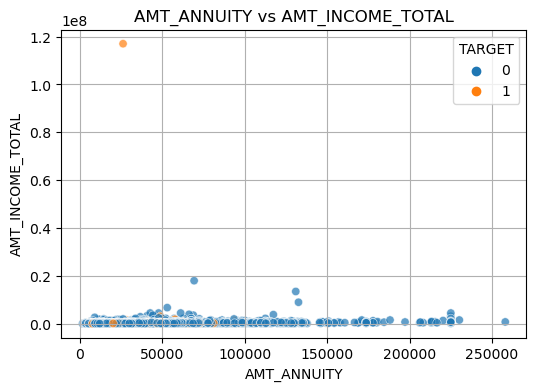

In [8]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='AMT_ANNUITY', y='AMT_INCOME_TOTAL', color='blue', alpha=0.7, hue='TARGET')

plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('AMT_ANNUITY vs AMT_INCOME_TOTAL')
plt.grid(True)

#plt.ylim(top=0.35e8)


In [9]:

# Annuity to Income Ratio
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Credit to Income Ratio
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

df['INCOME_CREDIT_DIFF'] = df['AMT_INCOME_TOTAL'] - df['AMT_CREDIT']

# Difference in Days Employed and Age
df['DAYS_EMPLOYED_DIFF'] = df['DAYS_EMPLOYED'] - df['DAYS_BIRTH']

# Calculate Total Number of Enquiries to Credit Bureau
enquiries_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

df['TOTAL_ENQUIRIES_CREDIT_BUREAU'] = df[enquiries_columns].sum(axis=1)

# Normalize External Scores
external_scores = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
df['AVERAGE_EXT_SOURCE'] = df[external_scores].mean(axis=1)


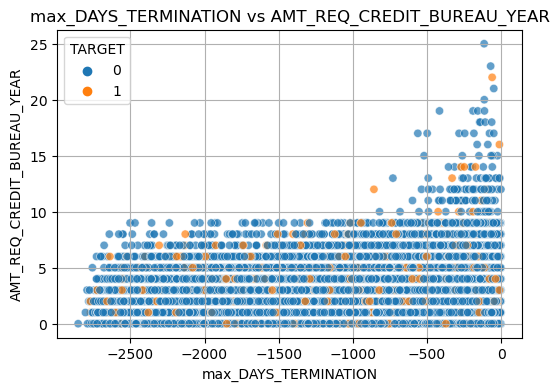

In [72]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='max_DAYS_TERMINATION', y='AMT_REQ_CREDIT_BUREAU_YEAR', color='blue', alpha=0.7, hue='TARGET')

plt.xlabel('max_DAYS_TERMINATION')
plt.ylabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.title('max_DAYS_TERMINATION vs AMT_REQ_CREDIT_BUREAU_YEAR')
plt.grid(True)

#plt.ylim(top=0.35e8)


In [73]:
df['AMT_REQ_CREDIT_BUREAU_YEAR_groupes'] = np.where(df['AMT_REQ_CREDIT_BUREAU_YEAR'] < 9.5 , 'A', 'B')

In [84]:
df['AMT_REQ_CREDIT_BUREAU_YEAR_groupes'].value_counts()

A    265851
B     41660
Name: AMT_REQ_CREDIT_BUREAU_YEAR_groupes, dtype: int64

In [10]:
df[enquiries_columns].dtypes

AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [11]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,count_CREDIT_ACTIVE_Closed,count_CREDIT_ACTIVE_Active,count_CREDIT_ACTIVE_Sold,count_CREDIT_ACTIVE_Bad_debt,count_CREDIT_CURRENCY_currency1,count_CREDIT_CURRENCY_currency2,count_CREDIT_CURRENCY_currency3,count_CREDIT_CURRENCY_currency4,max_DAYS_CREDIT,min_DAYS_CREDIT_ENDDATE_Active,max_DAYS_ENDDATE_FACT,max_AMT_CREDIT_MAX_OVERDUE,max_CNT_CREDIT_PROLONG,avg_AMT_CREDIT_SUM,avg_AMT_CREDIT_SUM_DEBT,avg_AMT_CREDIT_SUM_LIMIT,avg_AMT_CREDIT_SUM_OVERDUE,count_CREDIT_TYPE_Consumer_credit,count_CREDIT_TYPE_Creditc_card,count_CREDIT_TYPE_Mortgage,count_CREDIT_TYPE_Car_loan,count_CREDIT_TYPE_Microloan,count_CREDIT_TYPE_Loan_for_working_capital_replenishment,count_CREDIT_TYPE_Loan_for_business_development,count_CREDIT_TYPE_Real_estate_loan,count_CREDIT_TYPE_Unknown_type_of_loan,count_CREDIT_TYPE_Another_type_of_loan,count_CREDIT_TYPE_Cash_loan,count_CREDIT_TYPE_purchase_of_equipment,count_CREDIT_TYPE_Mobile_operator_loan,count_CREDIT_TYPE_Interbank_credit,count_CREDIT_TYPE_purchase_of_shares,max_DAYS_CREDIT_UPDATE,count_MONTHS_BALANCE,avg_AMT_BALANCE,avg_AMT_CREDIT_LIMIT_ACTUAL,avg_AMT_DRAWINGS_ATM_CURRENT,avg_AMT_DRAWINGS_CURRENT,avg_AMT_DRAWINGS_OTHER_CURRENT,avg_AMT_DRAWINGS_POS_CURRENT,avg_AMT_INST_MIN_REGULARITY,avg_AMT_PAYMENT_CURRENT,avg_AMT_PAYMENT_TOTAL_CURRENT,avg_AMT_RECEIVABLE_PRINCIPAL,avg_AMT_RECIVABLE,avg_AMT_TOTAL_RECEIVABLE,sum_CNT_DRAWINGS_ATM_CURRENT,sum_CNT_DRAWINGS_CURRENT,sum_CNT_DRAWINGS_OTHER_CURRENT,sum_CNT_DRAWINGS_POS_CURRENT,max_num_days_of_payment_late,max_Unpaid_balance,num_of_installments_didnt_pay_all_amt,count_MONTHS_BALANCE.1,min_CNT_INSTALMENT,min_CNT_INSTALMENT_FUTURE,avg_SK_DPD,avg_SK_DPD_DEF,count_pa_SK_ID_PREV,count_NAME_CONTRACT_TYPE_Cash_loans,count_NAME_CONTRACT_TYPE_Consumer_loans,avg_AMT_APPLICATION,avg_AMT_CREDIT,avg_AMT_DOWN_PAYMENT,avg_AMT_GOODS

In [12]:
df['DAYS_EMPLOYED_DIFF'].isna().sum()

0

# PCA

In [13]:
residence_information = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
                        'YEARS_BUILD_AVG' , 'COMMONAREA_AVG' ,  'ELEVATORS_AVG',
                        'ENTRANCES_AVG' ,   'FLOORSMAX_AVG' , 'FLOORSMIN_AVG',
                        'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',  'LIVINGAREA_AVG',
                        'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',  'APARTMENTS_MODE',
                        'BASEMENTAREA_MODE',  'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
                        'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                        'FLOORSMAX_MODE',
                        'FLOORSMIN_MODE',
                        'LANDAREA_MODE',
                        'LIVINGAPARTMENTS_MODE',
                        'LIVINGAREA_MODE',
                        'NONLIVINGAPARTMENTS_MODE',
                        'NONLIVINGAREA_MODE',
                        'APARTMENTS_MEDI',
                        'BASEMENTAREA_MEDI',
                        'YEARS_BEGINEXPLUATATION_MEDI',
                        'YEARS_BUILD_MEDI',
                        'COMMONAREA_MEDI',
                        'ELEVATORS_MEDI',
                        'ENTRANCES_MEDI',
                        'FLOORSMAX_MEDI',
                        'FLOORSMIN_MEDI',
                        'LANDAREA_MEDI',
                        'LIVINGAPARTMENTS_MEDI',
                        'LIVINGAREA_MEDI',
                        'NONLIVINGAPARTMENTS_MEDI',
                        'NONLIVINGAREA_MEDI',
                        #'FONDKAPREMONT_MODE',
                        #'HOUSETYPE_MODE',
                        'TOTALAREA_MODE',
                        #'WALLSMATERIAL_MODE',
                        'EMERGENCYSTATE_MODE',
                        'TARGET']

In [14]:
residence = df[residence_information].dropna()
residence_label = residence.TARGET.values
residence = residence.drop('TARGET', axis=1)

In [15]:
residence.head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,0.0
100003,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,0.0
100017,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,0.1417,0.0
100018,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001,0.3561,0.1386,0.9985,0.9804,0.1153,0.4028,0.1724,0.6667,0.7083,0.1798,0.3113,0.3932,0.0195,0.106,0.3529,0.1335,0.9985,0.9799,0.1150,0.40,0.1724,0.6667,0.7083,0.1789,0.2899,0.3842,0.0194,0.1022,0.3811,0.0
100022,0.0278,0.0617,0.9881,0.8368,0.0018,0.00,0.1034,0.0833,0.1250,0.0279,0.0227,0.0290,0.0000,0.0000,0.0284,0.0640,0.9881,0.8432,0.0018,0.0000,0.1034,0.0833,0.1250,0.0286,0.0248,0.0302,0.0000,0.000,0.0281,0.0617,0.9881,0.8390,0.0018,0.00,0.1034,0.0833,0.1250,0.0284,0.0231,0.0295,0.0000,0.0000,0.0238,0.0


In [16]:
#residence_label = residence.TARGET.values

In [17]:
type(residence_label)

numpy.ndarray

In [18]:
residence_label.shape

(81552,)

In [19]:
residence.shape

(81552, 44)

In [20]:
residence.dtypes

APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64


In [21]:
#residence.dropna().drop('TARGET', axis=1).head()

In [22]:
pca_residence = PCA(n_components=2)
pca_features_residence = pca_residence.fit_transform(residence)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)


In [23]:
pca_features_residence.shape

(81552, 2)

In [24]:
print(pca_residence.explained_variance_ratio_)


[0.55367172 0.15969151]


The explained variance, or eigenvalue, in PCA shows the variance that can be attributed to each of the principal components.

In [25]:
pca_residence_df = pd.DataFrame(
    data=pca_features_residence, 
    index= residence.index,
    columns=['PC1_residence', 'PC2_residence'])

In [26]:
residence_label

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
pca_residence_df['target'] = residence_label

In [28]:
pca_residence_df.head(10)

,PC1_residence,PC2_residence,target
SK_ID_CURR,,,
100002,-0.519948,0.024801,1
100003,-0.005672,-0.319036,0
100017,0.270088,-0.155193,0
100018,1.458365,-0.403824,0
100022,-0.427150,0.000969,0
100026,-0.195007,0.072994,0
100027,0.346673,-0.251310,0
100029,-0.032508,0.203787,0
100030,-0.394567,0.131211,0


In [29]:
residence.head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,0.0
100003,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,0.0
100017,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,0.1417,0.0
100018,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001,0.3561,0.1386,0.9985,0.9804,0.1153,0.4028,0.1724,0.6667,0.7083,0.1798,0.3113,0.3932,0.0195,0.106,0.3529,0.1335,0.9985,0.9799,0.1150,0.40,0.1724,0.6667,0.7083,0.1789,0.2899,0.3842,0.0194,0.1022,0.3811,0.0
100022,0.0278,0.0617,0.9881,0.8368,0.0018,0.00,0.1034,0.0833,0.1250,0.0279,0.0227,0.0290,0.0000,0.0000,0.0284,0.0640,0.9881,0.8432,0.0018,0.0000,0.1034,0.0833,0.1250,0.0286,0.0248,0.0302,0.0000,0.000,0.0281,0.0617,0.9881,0.8390,0.0018,0.00,0.1034,0.0833,0.1250,0.0284,0.0231,0.0295,0.0000,0.0000,0.0238,0.0


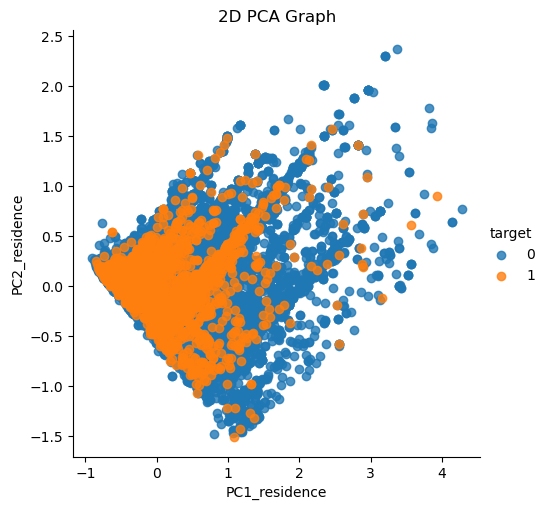

In [30]:
sns.lmplot(
    x='PC1_residence', 
    y='PC2_residence', 
    data=pca_residence_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [31]:
pca_residence_df.iloc[:,:2].head()

,PC1_residence,PC2_residence
SK_ID_CURR,,
100002,-0.519948,0.024801
100003,-0.005672,-0.319036
100017,0.270088,-0.155193
100018,1.458365,-0.403824
100022,-0.427150,0.000969


C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

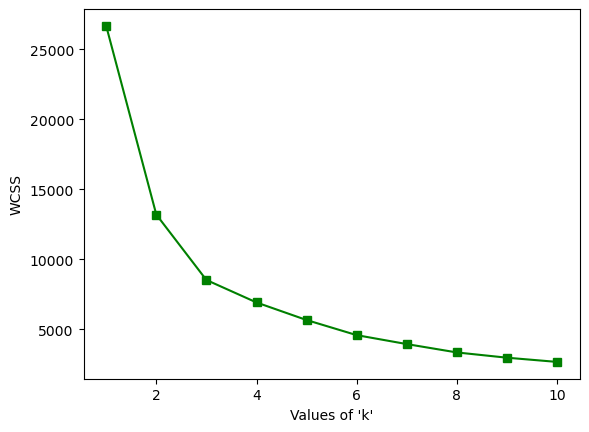

In [32]:

wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_residence_df.iloc[:,:2])
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(pca_residence_df.iloc[:,:2])

C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [34]:
centers = kmeans.cluster_centers_

In [35]:
#centers=pca_residence.transform(kmeans.cluster_centers_)

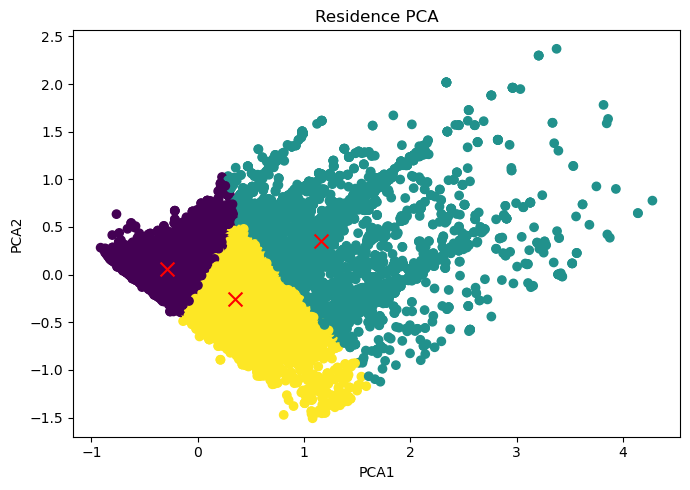

In [36]:

plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(pca_residence_df['PC1_residence'],pca_residence_df['PC2_residence'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Residence PCA')
plt.tight_layout()

In [37]:
pca_residence_df['pca_residence_CAT'] = kmeans.labels_

In [38]:
pca_residence_df.head()

,PC1_residence,PC2_residence,target,pca_residence_CAT
SK_ID_CURR,,,,
100002,-0.519948,0.024801,1,0
100003,-0.005672,-0.319036,0,2
100017,0.270088,-0.155193,0,2
100018,1.458365,-0.403824,0,1
100022,-0.427150,0.000969,0,0


In [39]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,count_CREDIT_ACTIVE_Closed,count_CREDIT_ACTIVE_Active,count_CREDIT_ACTIVE_Sold,count_CREDIT_ACTIVE_Bad_debt,count_CREDIT_CURRENCY_currency1,count_CREDIT_CURRENCY_currency2,count_CREDIT_CURRENCY_currency3,count_CREDIT_CURRENCY_currency4,max_DAYS_CREDIT,min_DAYS_CREDIT_ENDDATE_Active,max_DAYS_ENDDATE_FACT,max_AMT_CREDIT_MAX_OVERDUE,max_CNT_CREDIT_PROLONG,avg_AMT_CREDIT_SUM,avg_AMT_CREDIT_SUM_DEBT,avg_AMT_CREDIT_SUM_LIMIT,avg_AMT_CREDIT_SUM_OVERDUE,count_CREDIT_TYPE_Consumer_credit,count_CREDIT_TYPE_Creditc_card,count_CREDIT_TYPE_Mortgage,count_CREDIT_TYPE_Car_loan,count_CREDIT_TYPE_Microloan,count_CREDIT_TYPE_Loan_for_working_capital_replenishment,count_CREDIT_TYPE_Loan_for_business_development,count_CREDIT_TYPE_Real_estate_loan,count_CREDIT_TYPE_Unknown_type_of_loan,count_CREDIT_TYPE_Another_type_of_loan,count_CREDIT_TYPE_Cash_loan,count_CREDIT_TYPE_purchase_of_equipment,count_CREDIT_TYPE_Mobile_operator_loan,count_CREDIT_TYPE_Interbank_credit,count_CREDIT_TYPE_purchase_of_shares,max_DAYS_CREDIT_UPDATE,count_MONTHS_BALANCE,avg_AMT_BALANCE,avg_AMT_CREDIT_LIMIT_ACTUAL,avg_AMT_DRAWINGS_ATM_CURRENT,avg_AMT_DRAWINGS_CURRENT,avg_AMT_DRAWINGS_OTHER_CURRENT,avg_AMT_DRAWINGS_POS_CURRENT,avg_AMT_INST_MIN_REGULARITY,avg_AMT_PAYMENT_CURRENT,avg_AMT_PAYMENT_TOTAL_CURRENT,avg_AMT_RECEIVABLE_PRINCIPAL,avg_AMT_RECIVABLE,avg_AMT_TOTAL_RECEIVABLE,sum_CNT_DRAWINGS_ATM_CURRENT,sum_CNT_DRAWINGS_CURRENT,sum_CNT_DRAWINGS_OTHER_CURRENT,sum_CNT_DRAWINGS_POS_CURRENT,max_num_days_of_payment_late,max_Unpaid_balance,num_of_installments_didnt_pay_all_amt,count_MONTHS_BALANCE.1,min_CNT_INSTALMENT,min_CNT_INSTALMENT_FUTURE,avg_SK_DPD,avg_SK_DPD_DEF,count_pa_SK_ID_PREV,count_NAME_CONTRACT_TYPE_Cash_loans,count_NAME_CONTRACT_TYPE_Consumer_loans,avg_AMT_APPLICATION,avg_AMT_CREDIT,avg_AMT_DOWN_PAYMENT,avg_AMT_GOODS

In [40]:

# Assuming you already have the dataframes df and pca_residence_df

# Create a new column in df to hold the values from pca_residents_CAT
df['pca_residence_CAT'] = df.index.map(pca_residence_df['pca_residence_CAT'].get)

# Fill missing values with 2
df['pca_residence_CAT'].fillna(3, inplace=True)

# Optional: If you want to convert the new column to integer type
df['pca_residence_CAT'] = df['pca_residence_CAT'].astype(int)

# Print the resulting dataframe
df.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,count_CREDIT_ACTIVE_Closed,count_CREDIT_ACTIVE_Active,count_CREDIT_ACTIVE_Sold,count_CREDIT_ACTIVE_Bad_debt,count_CREDIT_CURRENCY_currency1,count_CREDIT_CURRENCY_currency2,count_CREDIT_CURRENCY_currency3,count_CREDIT_CURRENCY_currency4,max_DAYS_CREDIT,min_DAYS_CREDIT_ENDDATE_Active,max_DAYS_ENDDATE_FACT,max_AMT_CREDIT_MAX_OVERDUE,max_CNT_CREDIT_PROLONG,avg_AMT_CREDIT_SUM,avg_AMT_CREDIT_SUM_DEBT,avg_AMT_CREDIT_SUM_LIMIT,avg_AMT_CREDIT_SUM_OVERDUE,count_CREDIT_TYPE_Consumer_credit,count_CREDIT_TYPE_Creditc_card,count_CREDIT_TYPE_Mortgage,count_CREDIT_TYPE_Car_loan,count_CREDIT_TYPE_Microloan,count_CREDIT_TYPE_Loan_for_working_capital_replenishment,count_CREDIT_TYPE_Loan_for_business_development,count_CREDIT_TYPE_Real_estate_loan,count_CREDIT_TYPE_Unknown_type_of_loan,count_CREDIT_TYPE_Another_type_of_loan,count_CREDIT_TYPE_Cash_loan,count_CREDIT_TYPE_purchase_of_equipment,count_CREDIT_TYPE_Mobile_operator_loan,count_CREDIT_TYPE_Interbank_credit,count_CREDIT_TYPE_purchase_of_shares,max_DAYS_CREDIT_UPDATE,count_MONTHS_BALANCE,avg_AMT_BALANCE,avg_AMT_CREDIT_LIMIT_ACTUAL,avg_AMT_DRAWINGS_ATM_CURRENT,avg_AMT_DRAWINGS_CURRENT,avg_AMT_DRAWINGS_OTHER_CURRENT,avg_AMT_DRAWINGS_POS_CURRENT,avg_AMT_INST_MIN_REGULARITY,avg_AMT_PAYMENT_CURRENT,avg_AMT_PAYMENT_TOTAL_CURRENT,avg_AMT_RECEIVABLE_PRINCIPAL,avg_AMT_RECIVABLE,avg_AMT_TOTAL_RECEIVABLE,sum_CNT_DRAWINGS_ATM_CURRENT,sum_CNT_DRAWINGS_CURRENT,sum_CNT_DRAWINGS_OTHER_CURRENT,sum_CNT_DRAWINGS_POS_CURRENT,max_num_days_of_payment_late,max_Unpaid_balance,num_of_installments_didnt_pay_all_amt,count_MONTHS_BALANCE.1,min_CNT_INSTALMENT,min_CNT_INSTALMENT_FUTURE,avg_SK_DPD,avg_SK_DPD_DEF,count_pa_SK_ID_PREV,count_NAME_CONTRACT_TYPE_Cash_loans,count_NAME_CONTRACT_TYPE_Consumer_loans,avg_AMT_APPLICATION,avg_AMT_CREDIT,avg_AMT_DOWN_PAYMENT,avg_AMT_GOODS

In [41]:
credit_infofmation = ['AMT_CREDIT',
                   'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'count_CREDIT_ACTIVE_Closed',
                    'count_CREDIT_ACTIVE_Active',
                    'count_CREDIT_ACTIVE_Sold',
                    'count_CREDIT_CURRENCY_currency1',
                    'count_CREDIT_CURRENCY_currency2',
                    'count_CREDIT_CURRENCY_currency3',
                    'max_DAYS_CREDIT',
                    'min_DAYS_CREDIT_ENDDATE_Active',
                    'max_AMT_CREDIT_MAX_OVERDUE',
                    'max_CNT_CREDIT_PROLONG',
                    'avg_AMT_CREDIT_SUM',
                    'avg_AMT_CREDIT_SUM_DEBT',
                    'avg_AMT_CREDIT_SUM_LIMIT',
                    'avg_AMT_CREDIT_SUM_OVERDUE',
                    'count_CREDIT_TYPE_Consumer_credit',
                    'count_CREDIT_TYPE_Creditc_card',
                    'count_CREDIT_TYPE_Mortgage',
                    'count_CREDIT_TYPE_Car_loan',
                    'count_CREDIT_TYPE_Microloan',
                    'count_CREDIT_TYPE_Loan_for_working_capital_replenishment',
                    'count_CREDIT_TYPE_Loan_for_business_development',
                    'count_CREDIT_TYPE_Unknown_type_of_loan',
                    'count_CREDIT_TYPE_Another_type_of_loan',
                    'count_CREDIT_TYPE_Cash_loan',
                    'count_CREDIT_TYPE_purchase_of_equipment',
                    'max_DAYS_CREDIT_UPDATE',
                    'avg_AMT_CREDIT_LIMIT_ACTUAL',
                    'avg_AMT_CREDIT',
                    'TARGET'
                    ]

In [42]:
df[credit_infofmation].head()

,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,count_CREDIT_ACTIVE_Closed,count_CREDIT_ACTIVE_Active,count_CREDIT_ACTIVE_Sold,count_CREDIT_CURRENCY_currency1,count_CREDIT_CURRENCY_currency2,count_CREDIT_CURRENCY_currency3,max_DAYS_CREDIT,min_DAYS_CREDIT_ENDDATE_Active,max_AMT_CREDIT_MAX_OVERDUE,max_CNT_CREDIT_PROLONG,avg_AMT_CREDIT_SUM,avg_AMT_CREDIT_SUM_DEBT,avg_AMT_CREDIT_SUM_LIMIT,avg_AMT_CREDIT_SUM_OVERDUE,count_CREDIT_TYPE_Consumer_credit,count_CREDIT_TYPE_Creditc_card,count_CREDIT_TYPE_Mortgage,count_CREDIT_TYPE_Car_loan,count_CREDIT_TYPE_Microloan,count_CREDIT_TYPE_Loan_for_working_capital_replenishment,count_CREDIT_TYPE_Loan_for_business_development,count_CREDIT_TYPE_Unknown_type_of_loan,count_CREDIT_TYPE_Another_type_of_loan,count_CREDIT_TYPE_Cash_loan,count_CREDIT_TYPE_purchase_of_equipment,max_DAYS_CREDIT_UPDATE,avg_AMT_CREDIT_LIMIT_ACTUAL,avg_AMT_CREDIT,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,406597.5,0.0,0.0,0.0,0.0,1.0,6.0,2.0,0.0,8.0,0.0,0.0,-103.0,780.0,5043.64502,0.0,108131.945557,49156.2,7997.141113,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,NaN,179055.00,1
100003,1293502.5,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,-606.0,1216.0,0.00000,0.0,254350.125000,0.0,202500.000000,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.0,NaN,484191.00,0
100004,135000.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,-408.0,NaN,0.00000,0.0,94518.898438,0.0,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-382.0,NaN,20106.00,0
100006,312682.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270000.0,291695.50,0
100007,513000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1149.0,NaN,0.00000,0.0,146250.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-783.0,NaN,166638.75,0


In [43]:
credit = df[credit_infofmation].dropna()
credit_label = credit.TARGET.values
credit = credit.drop('TARGET', axis=1)

In [44]:
credit_label.shape

(43562,)

In [45]:
credit.shape

(43562, 34)

In [46]:
pca_credit = PCA(n_components=2)
pca_features_credit = pca_credit.fit_transform(credit)

In [47]:
print(pca_credit.explained_variance_ratio_)

[0.57174055 0.23627647]


In [48]:
pca_credit_df = pd.DataFrame(
    data=pca_features_credit, 
    index= credit.index,
    columns=['PC1_credit', 'PC2_credit'])

In [49]:
pca_credit_df['target'] = credit_label

In [50]:
pca_credit_df.head()

,PC1_credit,PC2_credit,target
SK_ID_CURR,,,
100023,-2.701336e+05,64766.440202,0
100047,1.730231e+06,-350026.096211,1
100049,-2.703336e+05,333138.430414,1
100059,1.033782e+05,-23906.663862,0
100082,2.625342e+05,185389.736539,0


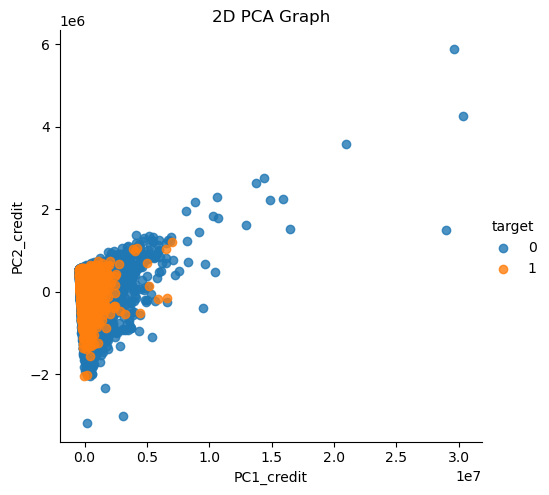

In [51]:
sns.lmplot(
    x='PC1_credit', 
    y='PC2_credit', 
    data=pca_credit_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

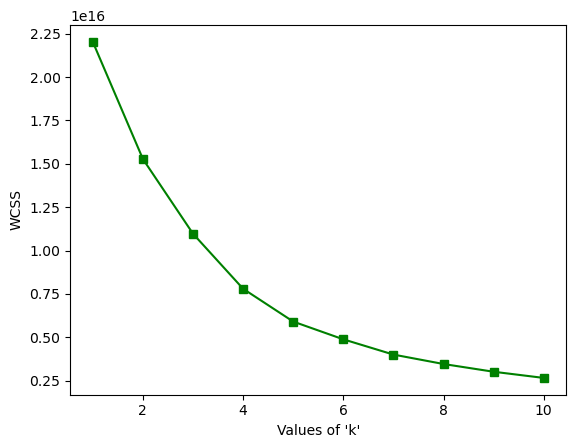

In [52]:

wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_credit_df.iloc[:,:2])
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(pca_credit_df.iloc[:,:2])

C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [54]:
centers = kmeans.cluster_centers_

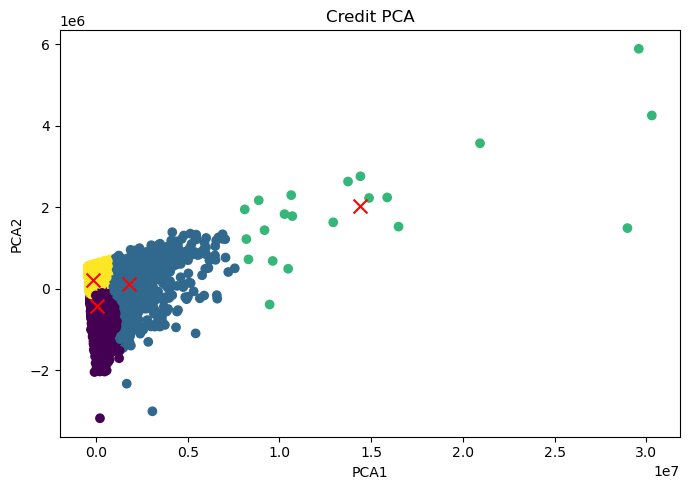

In [55]:

plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(pca_credit_df['PC1_credit'],pca_credit_df['PC2_credit'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Credit PCA')
plt.tight_layout()

In [56]:
pca_credit_df['pca_credit_CAT'] = kmeans.labels_

In [57]:
pca_credit_df.head()

,PC1_credit,PC2_credit,target,pca_credit_CAT
SK_ID_CURR,,,,
100023,-2.701336e+05,64766.440202,0,3
100047,1.730231e+06,-350026.096211,1,1
100049,-2.703336e+05,333138.430414,1,3
100059,1.033782e+05,-23906.663862,0,3
100082,2.625342e+05,185389.736539,0,3


In [58]:
pca_credit_df['pca_credit_CAT'].unique()

array([3, 1, 0, 2])

In [59]:
# Assuming you already have the dataframes df and pca_residence_df

# Create a new column in df to hold the values from pca_residents_CAT
df['pca_credit_CAT'] = df.index.map(pca_credit_df['pca_credit_CAT'].get)

# Fill missing values with 2
df['pca_credit_CAT'].fillna(4, inplace=True)

# Optional: If you want to convert the new column to integer type
df['pca_credit_CAT'] = df['pca_credit_CAT'].astype(int)

# Print the resulting dataframe
df.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,count_CREDIT_ACTIVE_Closed,count_CREDIT_ACTIVE_Active,count_CREDIT_ACTIVE_Sold,count_CREDIT_ACTIVE_Bad_debt,count_CREDIT_CURRENCY_currency1,count_CREDIT_CURRENCY_currency2,count_CREDIT_CURRENCY_currency3,count_CREDIT_CURRENCY_currency4,max_DAYS_CREDIT,min_DAYS_CREDIT_ENDDATE_Active,max_DAYS_ENDDATE_FACT,max_AMT_CREDIT_MAX_OVERDUE,max_CNT_CREDIT_PROLONG,avg_AMT_CREDIT_SUM,avg_AMT_CREDIT_SUM_DEBT,avg_AMT_CREDIT_SUM_LIMIT,avg_AMT_CREDIT_SUM_OVERDUE,count_CREDIT_TYPE_Consumer_credit,count_CREDIT_TYPE_Creditc_card,count_CREDIT_TYPE_Mortgage,count_CREDIT_TYPE_Car_loan,count_CREDIT_TYPE_Microloan,count_CREDIT_TYPE_Loan_for_working_capital_replenishment,count_CREDIT_TYPE_Loan_for_business_development,count_CREDIT_TYPE_Real_estate_loan,count_CREDIT_TYPE_Unknown_type_of_loan,count_CREDIT_TYPE_Another_type_of_loan,count_CREDIT_TYPE_Cash_loan,count_CREDIT_TYPE_purchase_of_equipment,count_CREDIT_TYPE_Mobile_operator_loan,count_CREDIT_TYPE_Interbank_credit,count_CREDIT_TYPE_purchase_of_shares,max_DAYS_CREDIT_UPDATE,count_MONTHS_BALANCE,avg_AMT_BALANCE,avg_AMT_CREDIT_LIMIT_ACTUAL,avg_AMT_DRAWINGS_ATM_CURRENT,avg_AMT_DRAWINGS_CURRENT,avg_AMT_DRAWINGS_OTHER_CURRENT,avg_AMT_DRAWINGS_POS_CURRENT,avg_AMT_INST_MIN_REGULARITY,avg_AMT_PAYMENT_CURRENT,avg_AMT_PAYMENT_TOTAL_CURRENT,avg_AMT_RECEIVABLE_PRINCIPAL,avg_AMT_RECIVABLE,avg_AMT_TOTAL_RECEIVABLE,sum_CNT_DRAWINGS_ATM_CURRENT,sum_CNT_DRAWINGS_CURRENT,sum_CNT_DRAWINGS_OTHER_CURRENT,sum_CNT_DRAWINGS_POS_CURRENT,max_num_days_of_payment_late,max_Unpaid_balance,num_of_installments_didnt_pay_all_amt,count_MONTHS_BALANCE.1,min_CNT_INSTALMENT,min_CNT_INSTALMENT_FUTURE,avg_SK_DPD,avg_SK_DPD_DEF,count_pa_SK_ID_PREV,count_NAME_CONTRACT_TYPE_Cash_loans,count_NAME_CONTRACT_TYPE_Consumer_loans,avg_AMT_APPLICATION,avg_AMT_CREDIT,avg_AMT_DOWN_PAYMENT,avg_AMT_GOODS

In [60]:
ext_source_information = ['EXT_SOURCE_1',
                         'EXT_SOURCE_2',
                         'EXT_SOURCE_3',
                          'TARGET'
                            ]

In [61]:
ext_source = df[ext_source_information].dropna()
ext_source_label = ext_source.TARGET.values
ext_source = ext_source.drop('TARGET', axis=1)

In [62]:
pca_ext_source = PCA(n_components=2)
pca_features_ext_source = pca_ext_source.fit_transform(ext_source)

In [63]:
print(pca_ext_source.explained_variance_ratio_)

[0.4618883  0.28599426]


In [64]:
pca_ext_source_df = pd.DataFrame(
    data=pca_features_ext_source, 
    index= ext_source.index,
    columns=['PC1_ext_source', 'PC2_ext_source'])

pca_ext_source_df['target'] = ext_source_label
pca_ext_source_df.head()

,PC1_ext_source,PC2_ext_source,target
SK_ID_CURR,,,
100002,0.611074,0.067054,1
100009,-0.282388,0.163127,0
100011,-0.055230,-0.254929,0
100014,0.160842,0.057875,0
100015,-0.252207,-0.035805,0


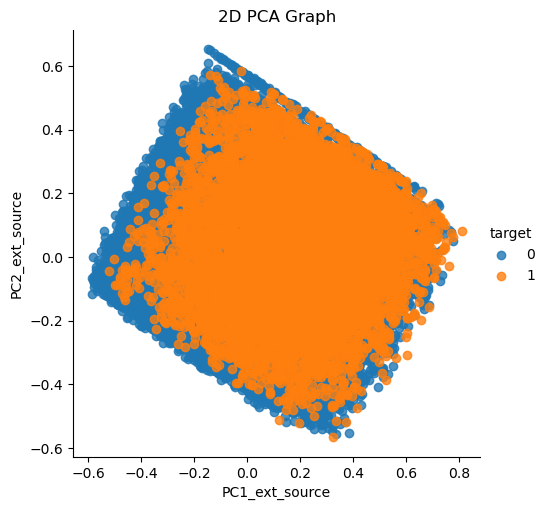

In [65]:
sns.lmplot(
    x='PC1_ext_source', 
    y='PC2_ext_source', 
    data=pca_ext_source_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

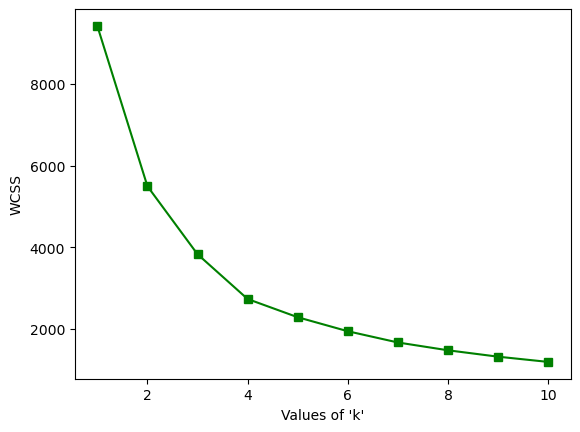

In [66]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_ext_source_df.iloc[:,:2])
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [67]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(pca_ext_source_df.iloc[:,:2])
centers = kmeans.cluster_centers_

C:\Users\netta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


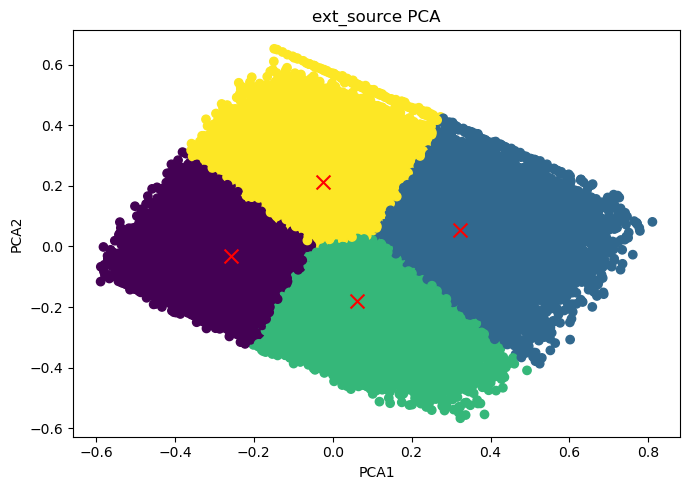

In [68]:

plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(pca_ext_source_df['PC1_ext_source'],pca_ext_source_df['PC2_ext_source'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('ext_source PCA')
plt.tight_layout()

In [69]:
pca_ext_source_df['pca_ext_source_CAT'] = kmeans.labels_
# Assuming you already have the dataframes df and pca_residence_df

# Create a new column in df to hold the values from pca_residents_CAT
df['pca_ext_source_CAT'] = df.index.map(pca_ext_source_df['pca_ext_source_CAT'].get)

# Fill missing values with 2
df['pca_ext_source_CAT'].fillna(4, inplace=True)

# Optional: If you want to convert the new column to integer type
df['pca_ext_source_CAT'] = df['pca_ext_source_CAT'].astype(int)

# Print the resulting dataframe
df.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,count_CREDIT_ACTIVE_Closed,count_CREDIT_ACTIVE_Active,count_CREDIT_ACTIVE_Sold,count_CREDIT_ACTIVE_Bad_debt,count_CREDIT_CURRENCY_currency1,count_CREDIT_CURRENCY_currency2,count_CREDIT_CURRENCY_currency3,count_CREDIT_CURRENCY_currency4,max_DAYS_CREDIT,min_DAYS_CREDIT_ENDDATE_Active,max_DAYS_ENDDATE_FACT,max_AMT_CREDIT_MAX_OVERDUE,max_CNT_CREDIT_PROLONG,avg_AMT_CREDIT_SUM,avg_AMT_CREDIT_SUM_DEBT,avg_AMT_CREDIT_SUM_LIMIT,avg_AMT_CREDIT_SUM_OVERDUE,count_CREDIT_TYPE_Consumer_credit,count_CREDIT_TYPE_Creditc_card,count_CREDIT_TYPE_Mortgage,count_CREDIT_TYPE_Car_loan,count_CREDIT_TYPE_Microloan,count_CREDIT_TYPE_Loan_for_working_capital_replenishment,count_CREDIT_TYPE_Loan_for_business_development,count_CREDIT_TYPE_Real_estate_loan,count_CREDIT_TYPE_Unknown_type_of_loan,count_CREDIT_TYPE_Another_type_of_loan,count_CREDIT_TYPE_Cash_loan,count_CREDIT_TYPE_purchase_of_equipment,count_CREDIT_TYPE_Mobile_operator_loan,count_CREDIT_TYPE_Interbank_credit,count_CREDIT_TYPE_purchase_of_shares,max_DAYS_CREDIT_UPDATE,count_MONTHS_BALANCE,avg_AMT_BALANCE,avg_AMT_CREDIT_LIMIT_ACTUAL,avg_AMT_DRAWINGS_ATM_CURRENT,avg_AMT_DRAWINGS_CURRENT,avg_AMT_DRAWINGS_OTHER_CURRENT,avg_AMT_DRAWINGS_POS_CURRENT,avg_AMT_INST_MIN_REGULARITY,avg_AMT_PAYMENT_CURRENT,avg_AMT_PAYMENT_TOTAL_CURRENT,avg_AMT_RECEIVABLE_PRINCIPAL,avg_AMT_RECIVABLE,avg_AMT_TOTAL_RECEIVABLE,sum_CNT_DRAWINGS_ATM_CURRENT,sum_CNT_DRAWINGS_CURRENT,sum_CNT_DRAWINGS_OTHER_CURRENT,sum_CNT_DRAWINGS_POS_CURRENT,max_num_days_of_payment_late,max_Unpaid_balance,num_of_installments_didnt_pay_all_amt,count_MONTHS_BALANCE.1,min_CNT_INSTALMENT,min_CNT_INSTALMENT_FUTURE,avg_SK_DPD,avg_SK_DPD_DEF,count_pa_SK_ID_PREV,count_NAME_CONTRACT_TYPE_Cash_loans,count_NAME_CONTRACT_TYPE_Consumer_loans,avg_AMT_APPLICATION,avg_AMT_CREDIT,avg_AMT_DOWN_PAYMENT,avg_AMT_GOODS

In [85]:
cat_cols = []
num_cols = []

for col in df.columns:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]) or df[col].nunique() <= 8:
        cat_cols.append(col)
    else:
        num_cols.append(col)

print(f'string or categorical columns:\n {cat_cols}')
print('--------------------------------------------------------------------------------------------------------------------')
print(f'numeric columns:\n {num_cols}')


string or categorical columns:
 ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOC

Share Variables Across Notebooks:

In [86]:
%store df
%store cat_cols
%store num_cols

Stored 'df' (DataFrame)
Stored 'cat_cols' (list)
Stored 'num_cols' (list)
